# Estudio Introduccion

In [11]:
import pandas as pd
import numpy as np
df=pd.read_csv("got_battles.csv")
df.head(5)


,me,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [4]:
df.attacker_king.value_counts('%')

Joffrey/Tommen Baratheon    0.388889
Robb Stark                  0.277778
Balon/Euron Greyjoy         0.194444
Stannis Baratheon           0.138889
Name: attacker_king, dtype: float64

In [6]:
14/len(df)

0.3684210526315789

In [9]:
df.attacker_king.isna().value_counts()

False    36
True      2
Name: attacker_king, dtype: int64

In [13]:
df['attackers_non_baratheon']=np.where(df.attacker_king!='Joffrey/Tommen Baratheon',1,0)
df['attackers_non_baratheon'].value_counts('%')

1    0.631579
0    0.368421
Name: attackers_non_baratheon, dtype: float64

Cuando considero la suma de todos los eventos el principio de normalización se cumple no queda nada fuera del espacio muestral

# Axioma de Kolmogorov

Toda probabilidad debe cumplir con axiomas para ser considerado
- No negatividad, todo evento dentro de un espacio muestral debe existir
- Todo evento mutuamente excluyente responde a una suma
- La probabilidad de todos los eventos dentro de un espacio muestral debe sumar 1

In [30]:
batallas_rey=df['attacker_king'].value_counts('%')


In [31]:
#No Negatividad
type(batallas_rey)

pandas.core.series.Series

In [36]:
#Aditividad y normalización
cummulative_pr=0
string_pr=''
for i in batallas_rey:
    print(i)
    cummulative_pr +=i
print(cummulative_pr)

0.3888888888888889
0.2777777777777778
0.19444444444444445
0.1388888888888889
1.0


# Eventos 
hemos estado interesados en ver el resultado de attackers kings y ahora cambiamos un poco y vemos la siguiente ejemplificación: 


In [4]:
df.loc[:,['major_death', 'major_capture']].head(5)

,major_death,major_capture
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,1.0
4,1.0,1.0


Tenemos dos condiciones, el animal = Gato y color = Azul
Si el animal es gato O es azul se ejecuta

iterrows

In [7]:
count=0
for i,v in df.iterrows():
    if v['major_death']==1.0 or v['major_capture']==1.0:
        print(v.me)
        count+=1


Battle of the Golden Tooth
Battle at the Mummer's Ford
Battle of Riverrun
Battle of the Green Fork
Battle of the Whispering Wood
Battle of Winterfell
Sack of Torrhen's Square
Sack of Winterfell
Battle of Oxcross
Siege of Storm's End
Sack of Harrenhal
Battle of the Blackwater
Battle of Duskendale
Retaking of Harrenhal
The Red Wedding
Siege of Seagard
Battle of Castle Black
Siege of Raventree
18


Aqui tenemos las batallas que cumplen con alguna de las condiciones anteriores.

In [8]:
count/len(df)

0.47368421052631576

## numpy logical_or

Evaluaremos 2 condiciones, si es que hubo una muerte mayot o si esque hubo una captura de un personaje relevante.
Lo que devuelve Logical_or una lista.

El proceso de Numpy suele ser mas eficiente dado que con iterrows se recorre una lista mientras que np utiliza funciones vectorizadas.

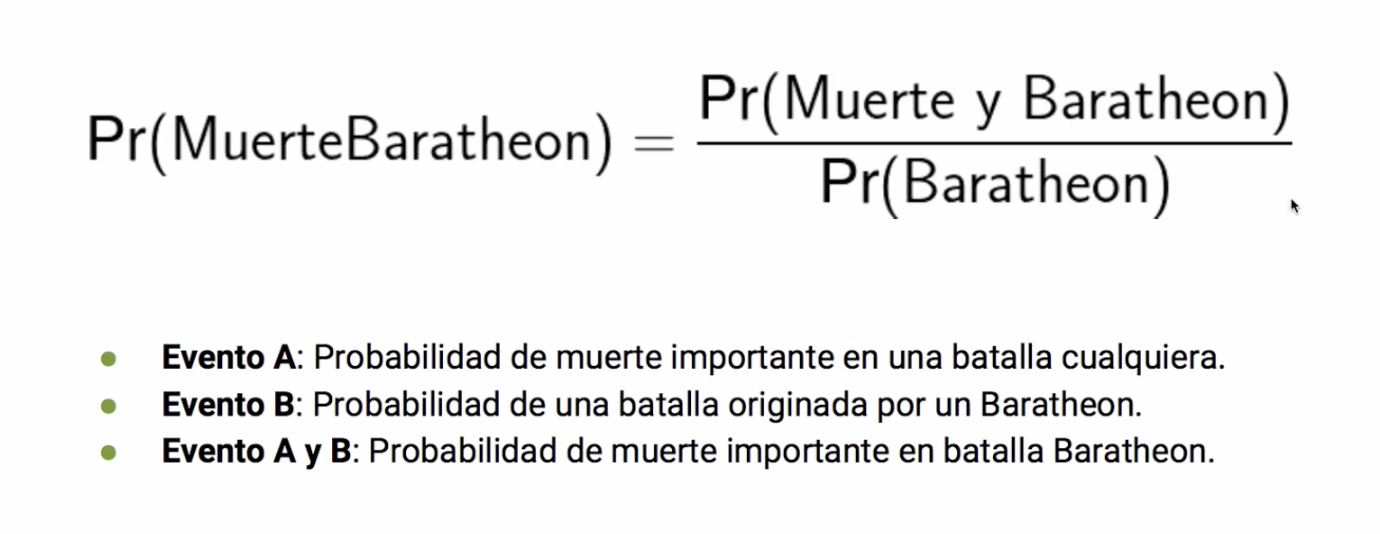

In [17]:
df['major_death_or_capture']=np.logical_or((df['major_death']==1.0), (df['major_capture']==1.0))
df['major_death_or_capture'].value_counts('%')

False    0.526316
True     0.473684
Name: major_death_or_capture, dtype: float64

# Probabilidad condicional
Responder a la verosimilitud de ocurrencia de un evento A con condicional en otro evento. 

La probabilidad del evento A con la condicion del evento B

Como hacerlo:
- Probabilidad de A
- Probabilidad de B

In [ ]:
muerte_importante=